## 라이브러리(패키지) import

데이터프레임, 행렬, 그래프 그리기 위한 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 불러오기

현재폴더 데이터 불러오기

In [2]:
ExampleData = pd.read_csv('./ExampleData.csv', sep=',', header=None)
ExampleData

,0,1,2,3
0,0.000000,0.016440,-0.014200,0.001433
1,0.000078,0.013822,-0.015707,0.001504
2,0.000156,0.019431,-0.016963,0.001433
3,0.000234,0.003726,-0.017248,0.001549
4,0.000313,0.022049,-0.009840,0.001864
...,...,...,...,...
2769,0.216330,0.077392,0.002404,0.003453
2770,0.216410,0.030276,0.003952,0.003498
2771,0.216480,0.017188,0.005504,0.003397
2772,0.216560,0.037754,-0.000108,0.003506


하위폴더 데이터 불러오기

In [3]:
path = './Subfolder/ExampleData2.csv' # 파일 경로
ExampleData2 = pd.read_csv(path, sep=',',names=['time', 'Accelerometer', 'Voltage', 'Current'])
ExampleData2

,time,Accelerometer,Voltage,Current
0,0.000000,0.016440,-0.014200,0.001433
1,0.000078,0.013822,-0.015707,0.001504
2,0.000156,0.019431,-0.016963,0.001433
3,0.000234,0.003726,-0.017248,0.001549
4,0.000313,0.022049,-0.009840,0.001864
...,...,...,...,...
2769,0.216330,0.077392,0.002404,0.003453
2770,0.216410,0.030276,0.003952,0.003498
2771,0.216480,0.017188,0.005504,0.003397
2772,0.216560,0.037754,-0.000108,0.003506


## 데이터 핸들링 (Handling)

시간열(time column) 제거한 센서 데이터 추출

In [4]:
SensorDataOnly = ExampleData.iloc[:,1:]
SensorDataOnly

,1,2,3
0,0.016440,-0.014200,0.001433
1,0.013822,-0.015707,0.001504
2,0.019431,-0.016963,0.001433
3,0.003726,-0.017248,0.001549
4,0.022049,-0.009840,0.001864
...,...,...,...
2769,0.077392,0.002404,0.003453
2770,0.030276,0.003952,0.003498
2771,0.017188,0.005504,0.003397
2772,0.037754,-0.000108,0.003506


0.01초부터 0.02초까지 해당하는 데이터 추출

In [5]:
StartPoint = np.where(ExampleData.iloc[:,0].values == 0.01)[0][0]
EndPoint   = np.where(ExampleData.iloc[:,0].values == 0.02)[0][0]

StartPoint, EndPoint

(128, 256)

In [6]:
NewData = ExampleData.iloc[StartPoint:EndPoint, :]
NewData

,0,1,2,3
128,0.010000,-0.017962,-0.010766,-0.005784
129,0.010078,-0.094246,0.022769,0.001770
130,0.010156,-0.103970,-0.086215,-0.008154
131,0.010234,-0.103590,0.165990,0.005673
132,0.010313,-0.103220,-0.925800,-0.033911
...,...,...,...,...
251,0.019609,-0.222880,2.025500,3.797800
252,0.019688,-0.213910,1.954200,3.787500
253,0.019766,-0.256910,1.879100,3.767100
254,0.019844,-0.278220,1.790100,3.738200


데이터를 파일(.csv)로 저장

In [7]:
path = './Subfolder/NewData_exercise.csv'
NewData.to_csv(path , sep=',' , header=None , index=None)

데이터 행렬바꾸기

In [8]:
TransposedData = np.transpose(NewData)
TransposedData.shape

(4, 128)

In [9]:
TransposedData = NewData.T
TransposedData.shape

(4, 128)

## 데이터 그래프 그리기

그리드, 라벨, 제목, 범례 표시 등

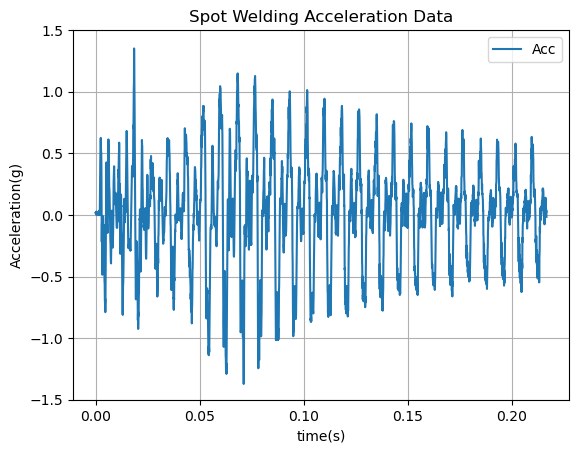

In [10]:
# ExampleData 0열 (1번째 열) = 시간
# ExampleData 1열 (2번째 열) = 가속도 센서 데이터

plt.plot(ExampleData.iloc[:,0], ExampleData.iloc[:,1])
plt.grid()                                                     # 그리드 표시
plt.xlabel('time(s)')                                          # x 라벨 표시
plt.ylabel('Acceleration(g)')                                  # y 라벨 표시
plt.title('Spot Welding Acceleration Data')                    # 제목 표시
plt.legend(['Acc'], loc = 'upper right', fontsize=10)          # 범례 표시
#plt.xlim(0,0.02) # x축 범위 설정
plt.ylim(-1.5,1.5) # y축 범위 설정
plt.show()

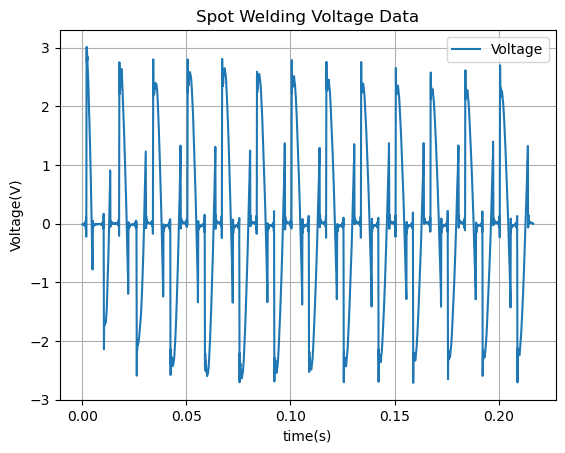

In [11]:
# ExampleData 0열 (1번째 열) = 시간
# ExampleData 2열 (3번째 열) = 전압 센서 데이터

plt.plot(ExampleData.iloc[:,0], ExampleData.iloc[:,2])
plt.grid()                                                     # 그리드 표시
plt.xlabel('time(s)')                                          # x 라벨 표시
plt.ylabel('Voltage(V)')                                       # y 라벨 표시
plt.title('Spot Welding Voltage Data')                         # 제목 표시
plt.legend(['Voltage'], loc = 'upper right', fontsize=10)      # 범례 표시
plt.show()

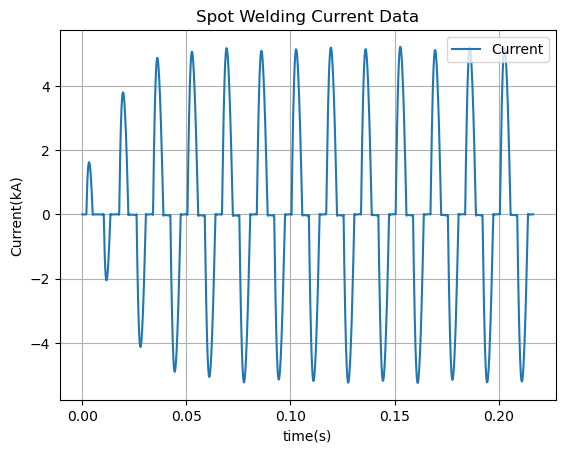

In [12]:
# ExampleData 0열 (1번째 열) = 시간
# ExampleData 3열 (4번째 열) = 전류 센서 데이터

plt.plot(ExampleData.iloc[:,0], ExampleData.iloc[:,3])
plt.grid()                                                     # 그리드 표시
plt.xlabel('time(s)')                                          # x 라벨 표시
plt.ylabel('Current(kA)')                                      # y 라벨 표시
plt.title('Spot Welding Current Data')                         # 제목 표시
plt.legend(['Current'], loc = 'upper right', fontsize=10)      # 범례 표시
plt.show()


그래프 모양 변경 등

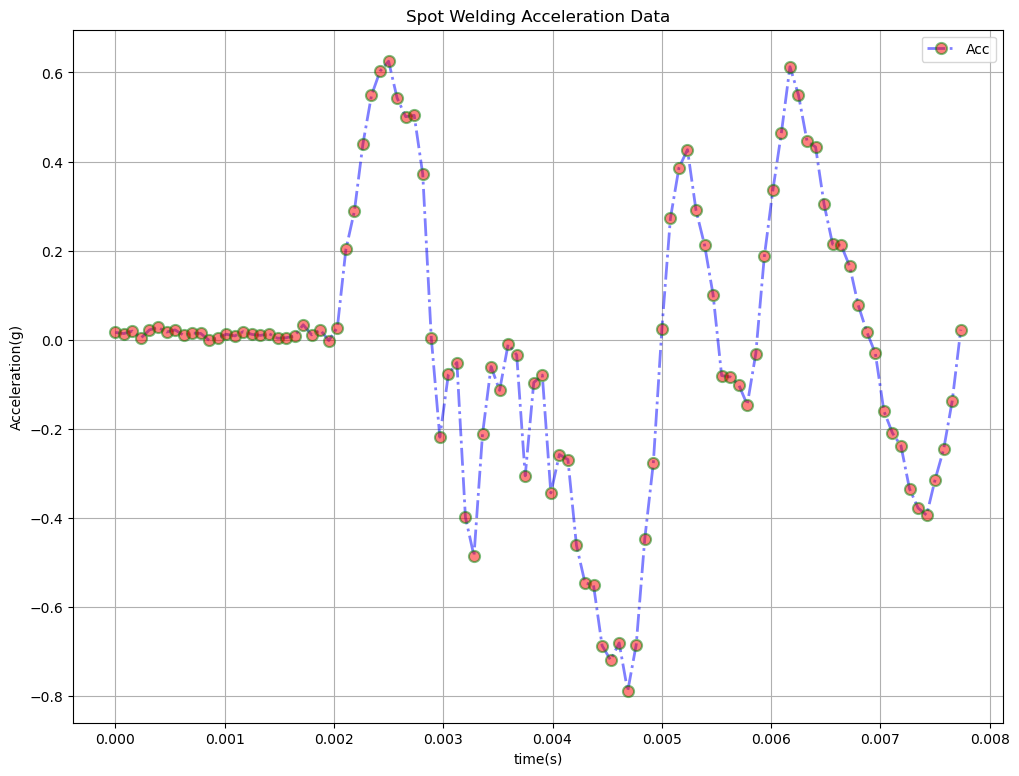

In [13]:
plt.figure(figsize = (12,9))
plt.plot(ExampleData.iloc[:100,0],ExampleData.iloc[:100,1],
         linestyle       = '-.', 
         linewidth       = 2.0, 
         color           = 'b',           
         marker          = 'o', 
         markersize      = 8, 
         markeredgecolor = 'g', 
         markeredgewidth = 1.5, 
         markerfacecolor = 'r', 
         alpha           = 0.5)

plt.grid()
plt.xlabel('time(s)') 
plt.ylabel('Acceleration(g)')
plt.title('Spot Welding Acceleration Data') 
plt.legend(['Acc'], loc = 'upper right', fontsize=10)

그래프 겹쳐서 그리기

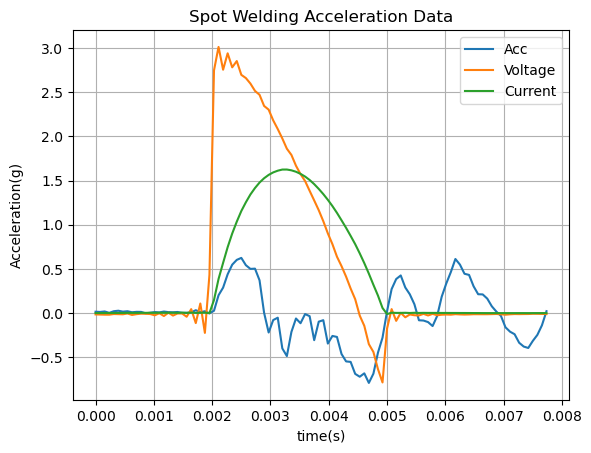

In [14]:
DataLength = 100   # 데이터 길이 100개까지만 제한 (~100/12800 초까지)

plt.plot(ExampleData.iloc[:DataLength,0],ExampleData.iloc[:DataLength,1])
plt.plot(ExampleData.iloc[:DataLength,0],ExampleData.iloc[:DataLength,2])
plt.plot(ExampleData.iloc[:DataLength,0],ExampleData.iloc[:DataLength,3])

plt.xlabel('time(s)')
plt.ylabel('Acceleration(g)')
plt.title('Spot Welding Acceleration Data')
plt.legend(['Acc', 'Voltage', 'Current'], loc = 'upper right', fontsize=10)

plt.grid()
plt.show()